## **Task-1:Titanic Survival Prediction**

Import the neccesary libraries


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

##### Data Loading and Preprocessing:
Load the dataset.

In [6]:
# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Handle missing values (e.g., age, cabin).


In [7]:
# Check for missing values in the dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

In [9]:
# Drop the 'Cabin' column due to many missing values
df.drop('Cabin', axis=1, inplace=True)

In [10]:
# Fill missing 'Embarked' values with the most frequent value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [11]:
# Verify that there are no more missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Convert categorical variables into numerical ones (e.g., gender, embarkation points).


In [12]:
# Encode the 'Sex' column (male = 1, female = 0)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

# Encode 'Embarked' column (C = 1, Q = 2, S = 0)
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# Select features and target variable
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
y = df['Survived']

##### Train-Test Split:
Split the dataset into training and testing sets.

In [13]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Display the first few rows of the training data
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2


##### **Exploratory Data Analysis (EDA):**

Visualize the distribution of survival across various features like gender, class, and age.
Analyze relationships between features and survival.

In [15]:
# Set the style for the plots
sns.set(style="whitegrid")

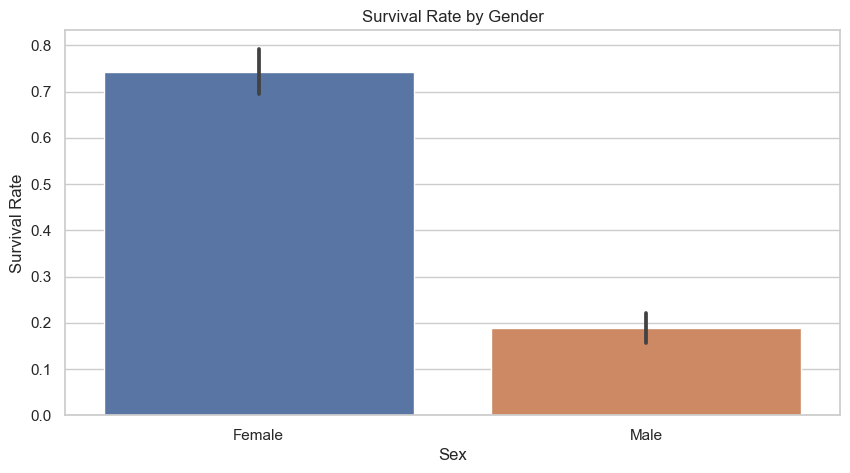

In [16]:
# Survival Rate by Gender
plt.figure(figsize=(10, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

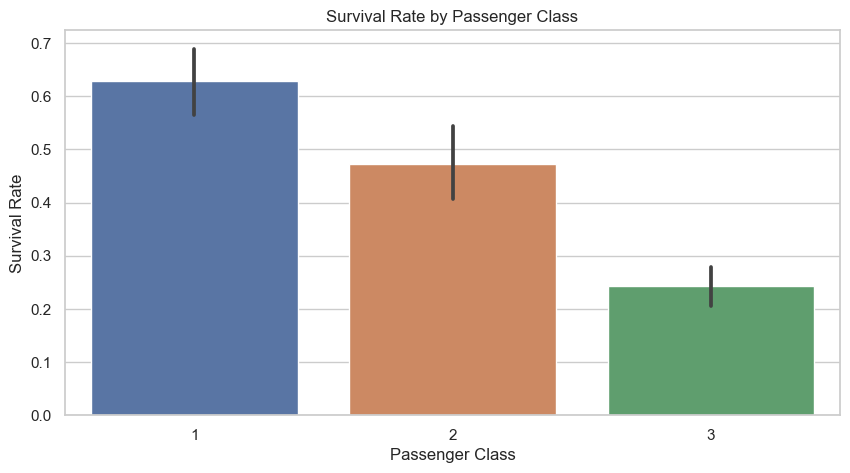

In [17]:
#Survival Rate by Passenger Class
plt.figure(figsize=(10, 5))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

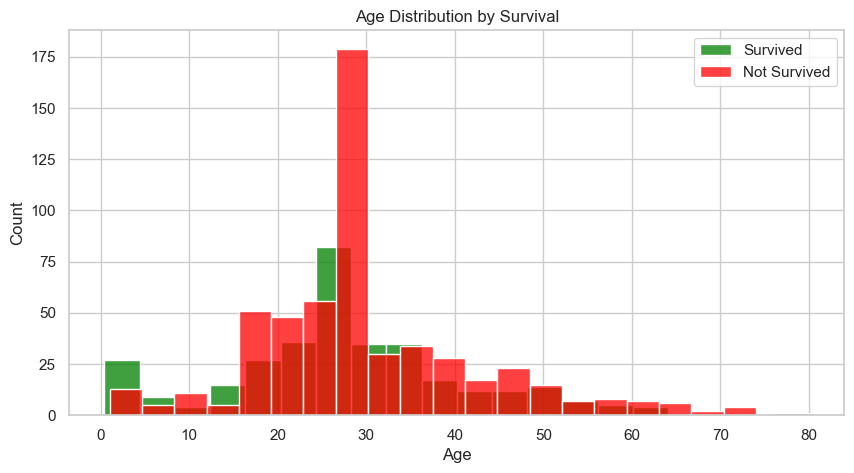

In [18]:
#Age Distribution by Survival
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Survived'] == 1]['Age'], bins=20, color='green', label='Survived', kde=False)
sns.histplot(df[df['Survived'] == 0]['Age'], bins=20, color='red', label='Not Survived', kde=False)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

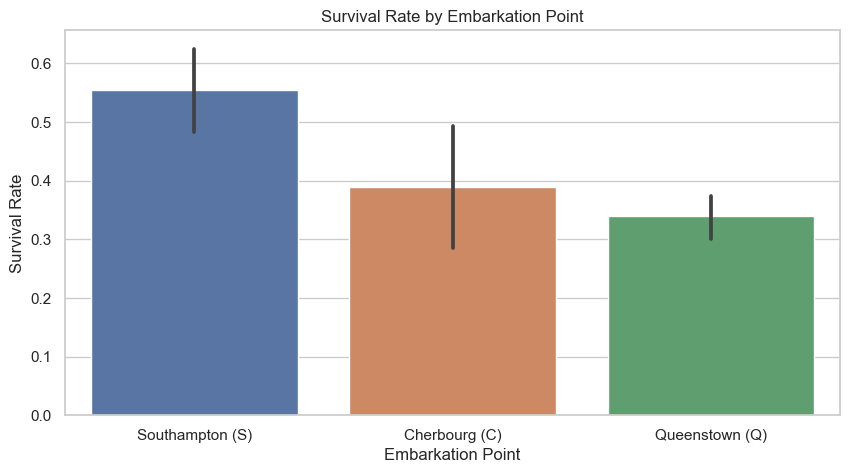

In [19]:
#Survival Rate by Embarkation Point
plt.figure(figsize=(10, 5))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Point')
plt.ylabel('Survival Rate')
plt.xlabel('Embarkation Point')
plt.xticks(ticks=[0, 1, 2], labels=['Southampton (S)', 'Cherbourg (C)', 'Queenstown (Q)'])
plt.show()



##### Model Building:
Build a basic machine learning model (e.g., Logistic Regression, RBandom Forest).

In [20]:
#Logistic Regression model
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
#Logistic Regression evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8100558659217877
Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [21]:
#Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#Random Forest evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8212290502793296
Random Forest Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

